<a href="https://colab.research.google.com/github/NadhaIrshad/In22-S5-EN3160---Image-Processing-and-Machine-Vision/blob/main/Point_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intensity Transformers

### Identity Transformations

s=T(r)=r

Every pixel keeps the same value, so the output image is exactly the same as the input.

#### Purpose
Often used as a reference or baseline when testing or comparing other transformations.

It’s like a “pass-through” filter — the identity transformation is useful for:

Debugging (check if your code is changing pixels when it shouldn’t)

Serving as a placeholder in code pipelines

Comparing histograms before/after enhancement

In [1]:
from google.colab import files
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

Saving cat.jpg to cat.jpg


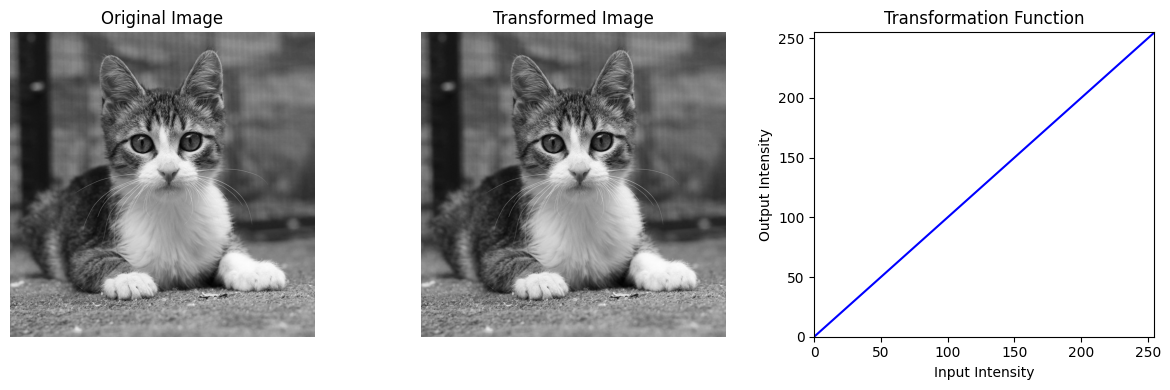

In [2]:
# Read image in grayscale
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Identity transformation lookup table
t = np.arange(256, dtype=np.uint8)  # s = r

# Apply transformation
g = t[f]

# Plot original, transformed, and transformation function
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Original
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')

# Transformation function
ax[2].plot(t, t, color='blue')
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_title('Transformation Function')

plt.tight_layout()
plt.show()


### Negative Transformation
Explanation
Inverts brightness: dark areas become light, and light areas become dark.

Useful for highlighting details in dark regions.

Formula
𝑠
=
𝑇
(
𝑟
)
=
(
𝐿
−
1
)
−
𝑟


where
𝐿
=
256 for 8-bit images.

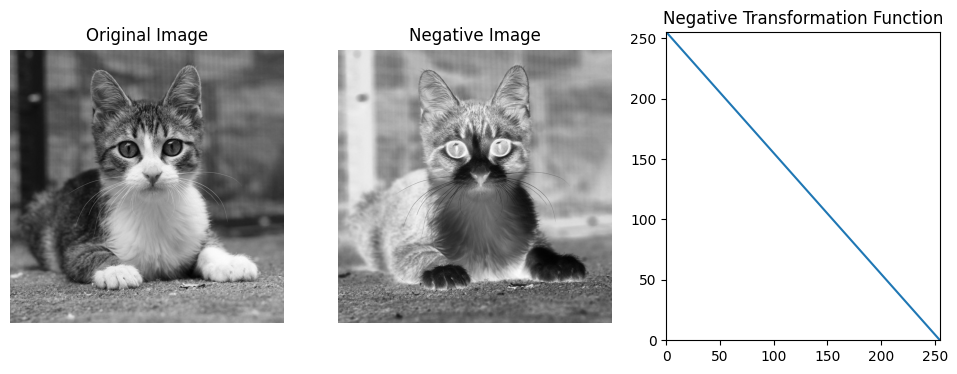

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Negative transformation table
L = 256
t = L - 1 - np.arange(256, dtype=np.uint8)
g = t[f]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Negative Image')
ax[1].axis('off')

ax[2].plot(t)
ax[2].set_xlim([0, 255])
ax[2].set_ylim([0, 255])
ax[2].set_title('Negative Transformation Function')

plt.show()


### What is cv.LUT() in OpenCV?
LUT stands for Look-Up Table.
It is a method to transform pixel values in an image by precomputing a mapping for all possible input intensities (0–255) and then applying that mapping directly.

Instead of recalculating the transformation for each pixel, you:

Create a table t where t[i] is the output value for input intensity i.

Pass the image and the table to cv.LUT() → OpenCV looks up each pixel’s new value from the table.

Why use LUT?
Speed: No repeated computation per pixel. The transformation is a single table lookup for each pixel.

Simplicity: Any point-wise transformation (negative, log, gamma, threshold, etc.) can be applied just by modifying the table.

Consistency: The same transformation can be applied to many images easily.

Saving cat.jpg to cat (1).jpg
NumPy indexing time: 0.001832 seconds
cv.LUT() time: 0.000732 seconds


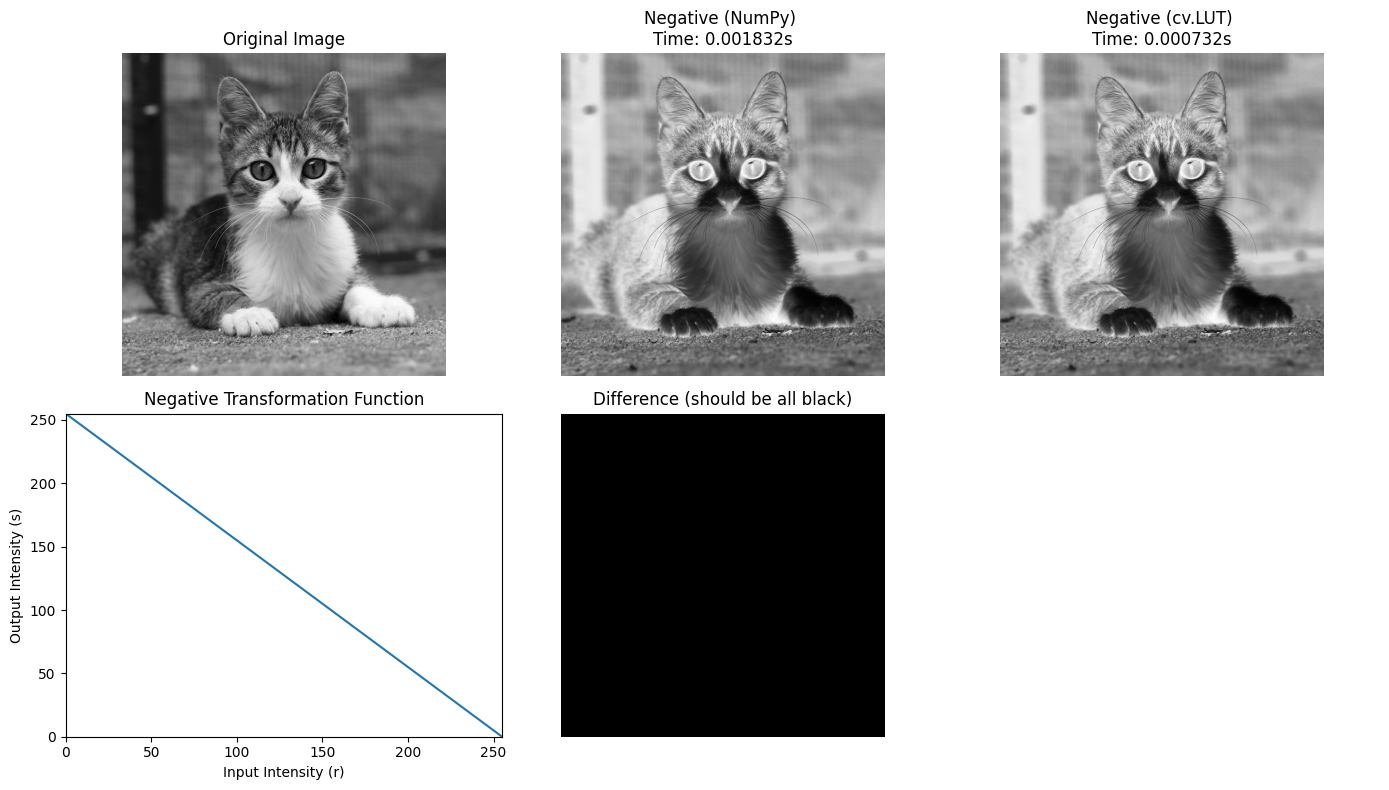

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time
from google.colab import files

# ==== Upload Image ====
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Read image in grayscale
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# ==== Negative Transformation Table ====
L = 256
t = L - 1 - np.arange(256, dtype=np.uint8)

# ==== Method 1: NumPy Indexing ====
start_time = time.time()
g_numpy = t[f]
numpy_time = time.time() - start_time

# ==== Method 2: OpenCV LUT ====
start_time = time.time()
g_lut = cv.LUT(f, t)
lut_time = time.time() - start_time

# ==== Results ====
print(f"NumPy indexing time: {numpy_time:.6f} seconds")
print(f"cv.LUT() time: {lut_time:.6f} seconds")

# ==== Plot Images ====
fig, ax = plt.subplots(2, 3, figsize=(14, 8))

# Original
ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

# NumPy Negative
ax[0, 1].imshow(g_numpy, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title(f"Negative (NumPy) \nTime: {numpy_time:.6f}s")
ax[0, 1].axis('off')

# LUT Negative
ax[0, 2].imshow(g_lut, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title(f"Negative (cv.LUT) \nTime: {lut_time:.6f}s")
ax[0, 2].axis('off')

# Transformation function
ax[1, 0].plot(t)
ax[1, 0].set_xlim([0, 255])
ax[1, 0].set_ylim([0, 255])
ax[1, 0].set_title('Negative Transformation Function')
ax[1, 0].set_xlabel('Input Intensity (r)')
ax[1, 0].set_ylabel('Output Intensity (s)')

# Difference between methods
diff = cv.absdiff(g_numpy, g_lut)
ax[1, 1].imshow(diff, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title("Difference (should be all black)")
ax[1, 1].axis('off')

# Empty axis for spacing
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()


### Log Transformation
Explanation
Expands dark pixel values and compresses bright pixel values.

Useful for enhancing details in dark regions.

Formula
𝑠
=
𝑇
(
𝑟
)
=
𝑐
⋅
log
⁡
(
1
+
𝑟
)
where:

𝑐
=
255
log
⁡
(
1
+
255
)
​


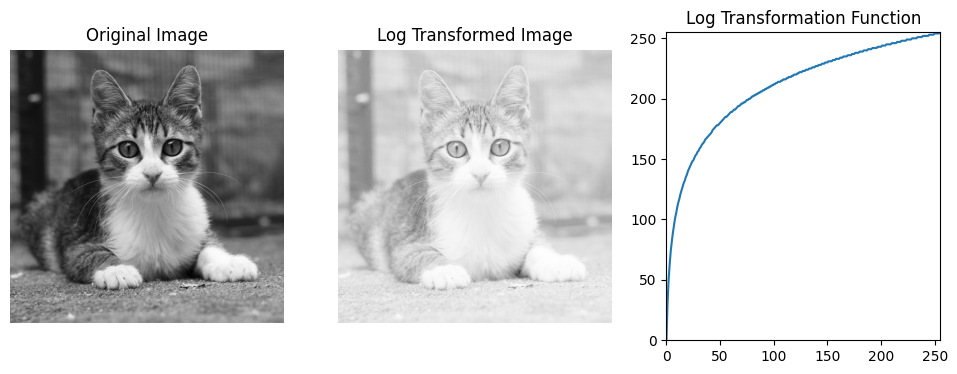

In [4]:
# Log transformation
c = 255 / np.log(1 + 255)
t = (c * np.log(1 + np.arange(256))).astype(np.uint8)
g = t[f]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Log Transformed Image')
ax[1].axis('off')

ax[2].plot(t)
ax[2].set_xlim([0, 255])
ax[2].set_ylim([0, 255])
ax[2].set_title('Log Transformation Function')

plt.show()


### Gamma Transformation (Power-law)
Explanation
Adjusts brightness non-linearly:

𝛾
<
1
γ<1 → brightens image

𝛾
>
1
γ>1 → darkens image

Useful for gamma correction in display systems.

Formula
𝑠
=
𝑇
(
𝑟
)
=
𝑐
⋅
𝑟
𝛾

where:

𝑐
=
255
255
𝛾
​



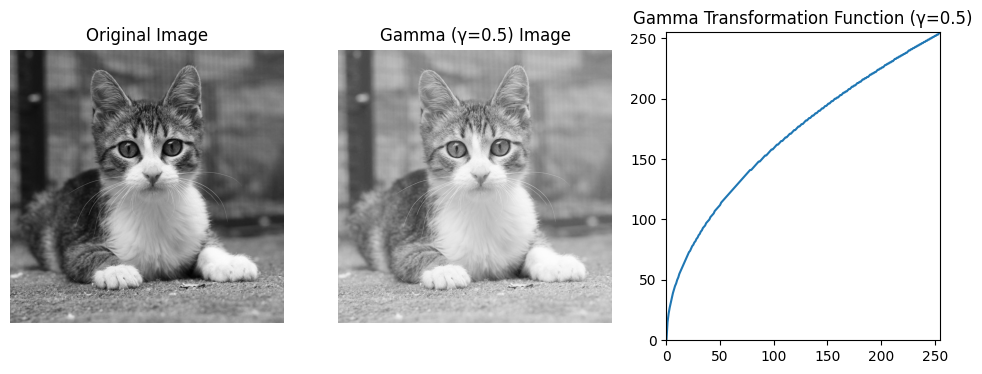

In [5]:
# Gamma transformation
gamma_val = 0.5  # try 0.5, 1.5, 2.0
c = 255 / (255 ** gamma_val)
t = (c * (np.arange(256) ** gamma_val)).astype(np.uint8)
g = t[f]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title(f'Gamma (γ={gamma_val}) Image')
ax[1].axis('off')

ax[2].plot(t)
ax[2].set_xlim([0, 255])
ax[2].set_ylim([0, 255])
ax[2].set_title(f'Gamma Transformation Function (γ={gamma_val})')

plt.show()
